In [2]:
#Load dataset
import pandas as pd

#specify the path to the file
file_path = "C:/Users/royin/Downloads/eeg_oddball_500p.csv"
df = pd.read_csv(file_path)

#display first few rows of the datase
df.head()

,participant_id,group,trial,channel,target,t0ms,t4ms,t8ms,t12ms,t16ms,...,t963ms,t967ms,t971ms,t975ms,t979ms,t983ms,t987ms,t991ms,t995ms,t1000ms
0,0,control,0,Cz,0,0.625084,-0.866273,-0.429473,-0.641889,-0.892982,...,-0.645724,-0.361515,0.167149,-0.187547,0.161392,0.065632,-0.483368,0.292162,0.436584,0.121467
1,0,control,0,Pz,0,-0.687173,1.212341,-0.421002,0.830964,-0.415593,...,0.357232,-0.239184,-0.309592,0.585605,0.233524,0.413463,-0.036532,-0.096301,-0.119617,0.264430
2,0,control,0,Fz,0,0.228797,0.146718,-0.749898,0.687776,0.238922,...,0.022817,0.099280,-0.284613,-0.216759,1.113103,0.191585,0.388106,-0.047609,-0.162347,0.692697
3,0,control,1,Cz,0,-0.911859,0.213521,-0.074605,-0.332463,-0.259678,...,0.385589,0.501976,0.433992,0.116074,-0.443458,0.429337,0.591176,0.508661,0.380467,0.616481
4,0,control,1,Pz,0,-0.832660,-0.071089,0.041206,0.210100,-0.583048,...,0.301212,0.728405,0.311948,0.065403,-0.222594,0.383816,-1.162521,-0.267457,-0.009845,1.233354


T-statistic: 0.5617, P-value: 0.5743


C:\Users\royin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


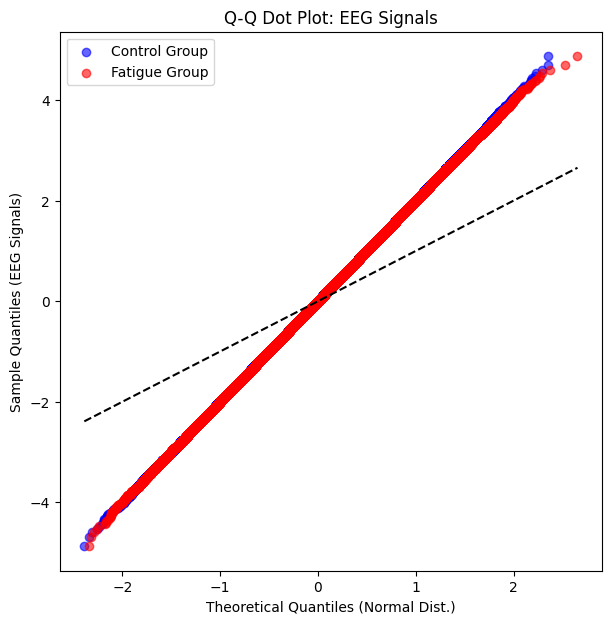

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Loading EEG dataset
df = pd.read_csv("C:/Users/royin/Downloads/eeg_oddball_500p.csv")

# Identifying EEG signal columns
eeg_columns = [col for col in df.columns if col.startswith('t') and col.endswith('ms')]

# Melting all EEG time columns into one "EEG_Signal" column
df_melted = df.melt(id_vars=['participant_id', 'group', 'trial', 'channel', 'target'],
                    value_vars=eeg_columns,
                    var_name='time',
                    value_name='EEG_Signal')

# Keep only Cz channel for analysis
df_melted = df_melted[df_melted['channel'] == 'Cz']

# Ensure EEG_Signal is numeric
df_melted['EEG_Signal'] = pd.to_numeric(df_melted['EEG_Signal'], errors='coerce')

# Filtering data for control and fatigue groups
control = df_melted[(df_melted['group'] == 'control') & (df_melted['target'] == 1)]
fatigue = df_melted[(df_melted['group'] == 'fatigue') & (df_melted['target'] == 1)]

# Independent t-test
if control.empty or fatigue.empty:
    print('Error: One of the groups is empty. Check your dataset!')
else:
    t_stat, p_value = stats.ttest_ind(fatigue['EEG_Signal'], control['EEG_Signal'], equal_var=False)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

    # Q-Q dot plot
    plt.figure(figsize=(7, 7))
    
    # Compute theoretical quantiles and ordered sample quantiles
    (ctrl_quantiles, ctrl_theoretical) = stats.probplot(control['EEG_Signal'], dist='norm')[0]
    (fat_quantiles, fat_theoretical) = stats.probplot(fatigue['EEG_Signal'], dist='norm')[0]

    # Ploting control group (blue dots)
    plt.scatter(ctrl_theoretical, ctrl_quantiles, color='blue', alpha=0.6, label='Control Group')

    # Ploting fatigue group (red dots)
    plt.scatter(fat_theoretical, fat_quantiles, color='red', alpha=0.6, label='Fatigue Group')

    # Reference diagonal
    min_val = min(ctrl_theoretical.min(), fat_theoretical.min())
    max_val = max(ctrl_theoretical.max(), fat_theoretical.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')

    # Labels and legend
    plt.xlabel('Theoretical Quantiles (Normal Dist.)')
    plt.ylabel('Sample Quantiles (EEG Signals)')
    plt.title('Q-Q Dot Plot: EEG Signals')
    plt.legend()
    
    plt.show()
